#### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#### Plotting functions

In [2]:
def plot_allforecasts(forecasts, n): 
    plt.rcParams["figure.figsize"] = (25,3)
    plt.plot(forecasts)
    plt.title(f'{n} hours')
    plt.show()

def get_subscript(x): 
    normal = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789+-=()"
    sub_s = "ₐ₈CDₑբGₕᵢⱼₖₗₘₙₒₚQᵣₛₜᵤᵥwₓᵧZₐ♭꜀ᑯₑբ₉ₕᵢⱼₖₗₘₙₒₚ૧ᵣₛₜᵤᵥwₓᵧ₂₀₁₂₃₄₅₆₇₈₉₊₋₌₍₎"
    res = x.maketrans(''.join(normal), ''.join(sub_s)) 
    return x.translate(res) 

In [28]:
def forecast_plot(actual, pred, no_change, ax, h, start, end, type=True):
    if type==False:
        label = 'pred'
        ylabel = 'Δ G.W'
    else:
        label= 'forecast'
        ylabel = 'Water levels'
    if h==2:
        ax.set_ylabel(ylabel, fontsize=20)
    if h==4:
        ax.set_xlabel('Timesteps', fontsize=20)
    ax.plot(actual[start:end], 'r', label='actual')
    ax.plot(pred[start:end], label=label)
    #ax.plot(no_change[start:end], c='black', linestyle='dashed', label='baseline')
    ax.title.set_text(f'{h}-hrs')
    ax.tick_params(labelrotation=45)


def plot_on_axis(baseline, strpmr, axes, j, start, end, h):
    forecast_plot(strpmr['actual'], strpmr['forecast'], baseline['forecast'], axes[j], h, start, end)
    

def plot_one_graph(baseline, strpmr, start, end, title):
    f = plt.figure()    
    f, axes = plt.subplots(1,5, sharex=False, sharey = True)
    f.set_size_inches(20, 4)
    plt.suptitle(title, fontsize=25)
    j = 0
    plot_on_axis(baseline[0], strpmr[0], axes, j, start, end, 2)
    plot_on_axis(baseline[1], strpmr[1], axes, (j+1), start, end, 3)
    plot_on_axis(baseline[2], strpmr[2], axes, (j+2), start, end, 4)
    plot_on_axis(baseline[3], strpmr[3], axes, (j+3), start, end, 8)
    plot_on_axis(baseline[4], strpmr[4], axes, (j+4), start, end, 12)

    labels = ['actual', 'forecast']
    f.legend(labels, loc = 'upper right',  bbox_transform = plt.gcf().transFigure)
    plt.savefig(f'../STRPMr/Qualitative/{title}.png')
    plt.tight_layout();

#### Load files

In [4]:
def read_csv(path):
    return pd.read_csv(path, delimiter=",", engine="python")

In [13]:
foldername = 'STRPMr'

pred2 = read_csv(f"../{foldername}/Qualitative/2hrs/predictions_2h.csv")
pred3 = read_csv(f"../{foldername}/Qualitative/3hrs/predictions_3h.csv")
pred4 = read_csv(f"../{foldername}/Qualitative/4hrs/predictions_4h.csv")
pred8 = read_csv(f"../{foldername}/Qualitative/8hrs/predictions_8h.csv")
pred12 = read_csv(f"../{foldername}/Qualitative/12hrs/predictions_12h.csv")

strpmr2 = read_csv(f"../{foldername}/Qualitative/2hrs/forecasts_2h.csv")
strpmr3 = read_csv(f"../{foldername}/Qualitative/3hrs/forecasts_3h.csv")
strpmr4 = read_csv(f"../{foldername}/Qualitative/4hrs/forecasts_4h.csv")
strpmr8 = read_csv(f"../{foldername}/Qualitative/8hrs/forecasts_8h.csv")
strpmr12 = read_csv(f"../{foldername}/Qualitative/12hrs/forecasts_12h.csv")

In [14]:
#foldername = 'Baseline'
baseline2 = read_csv(f"../{foldername}/Qualitative/2hrs/baseline_forecasts_2h.csv")
baseline3 = read_csv(f"../{foldername}/Qualitative/3hrs/baseline_forecasts_3h.csv")
baseline4 = read_csv(f"../{foldername}/Qualitative/4hrs/baseline_forecasts_4h.csv")
baseline8 = read_csv(f"../{foldername}/Qualitative/8hrs/baseline_forecasts_8h.csv")
baseline12 = read_csv(f"../{foldername}/Qualitative/12hrs/baseline_forecasts_12h.csv")

In [47]:
# List of all models forecasted timeseries for different forecasting horizons (2-12 hours)
baseline = [baseline2, baseline3, baseline4, baseline8, baseline12]
pred_strpmr = [pred2, pred3, pred4, pred8, pred12]
strpmr = [strpmr2, strpmr3, strpmr4, strpmr8, strpmr12]

#### Long sequence plots for predictions as well as forecasts

In [16]:
def evaluateFramework(foldername):
    hours = [2, 3, 4, 8, 12]
    for h in hours:
        forecast = read_csv(f"../{foldername}/Qualitative/{h}hrs/forecasts_{h}h.csv")
        plot_allforecasts(forecast, h)


~~~~~~~~~~~~ Baseline ~~~~~~~~~~~~



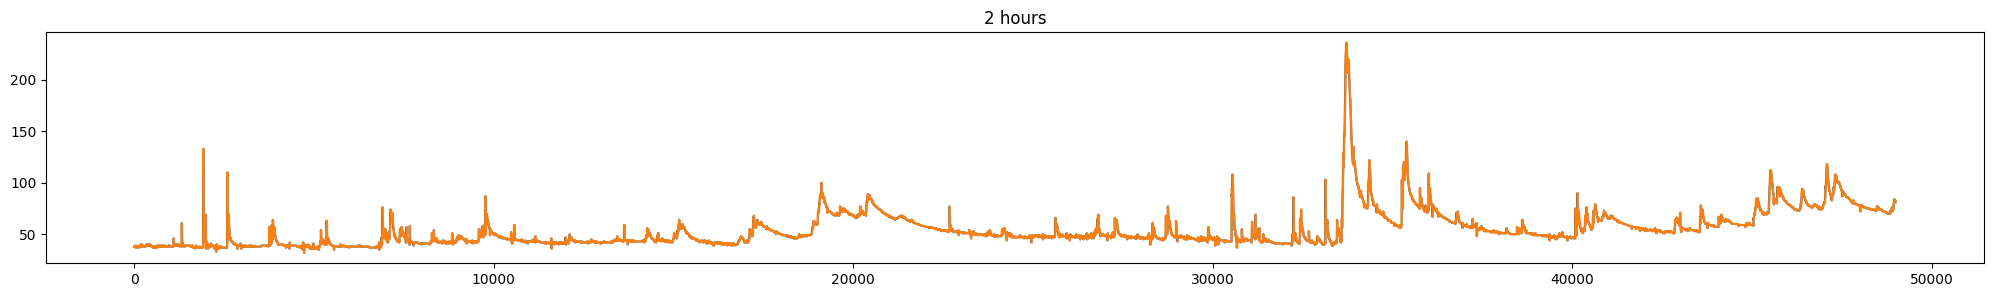

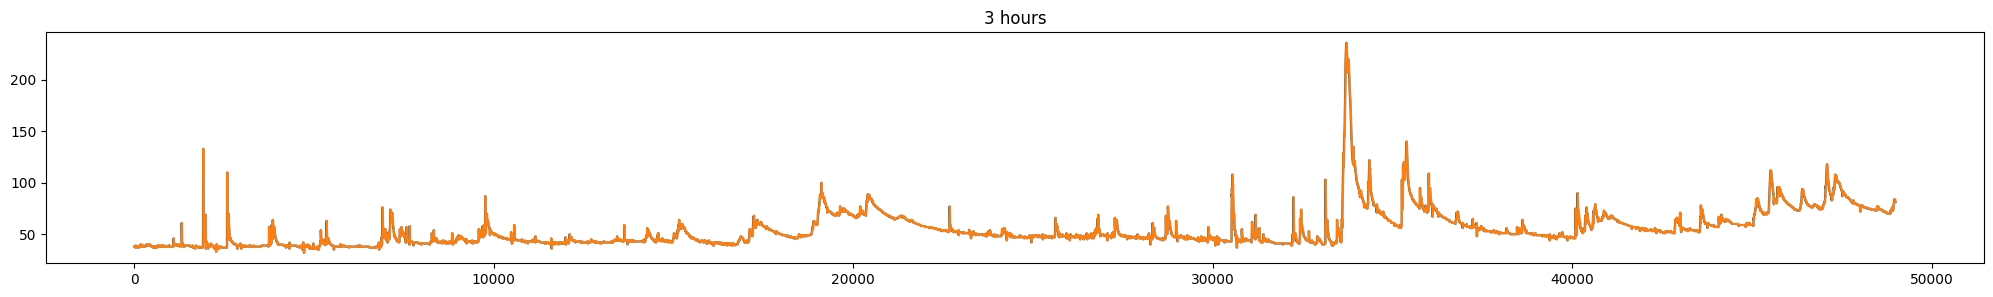

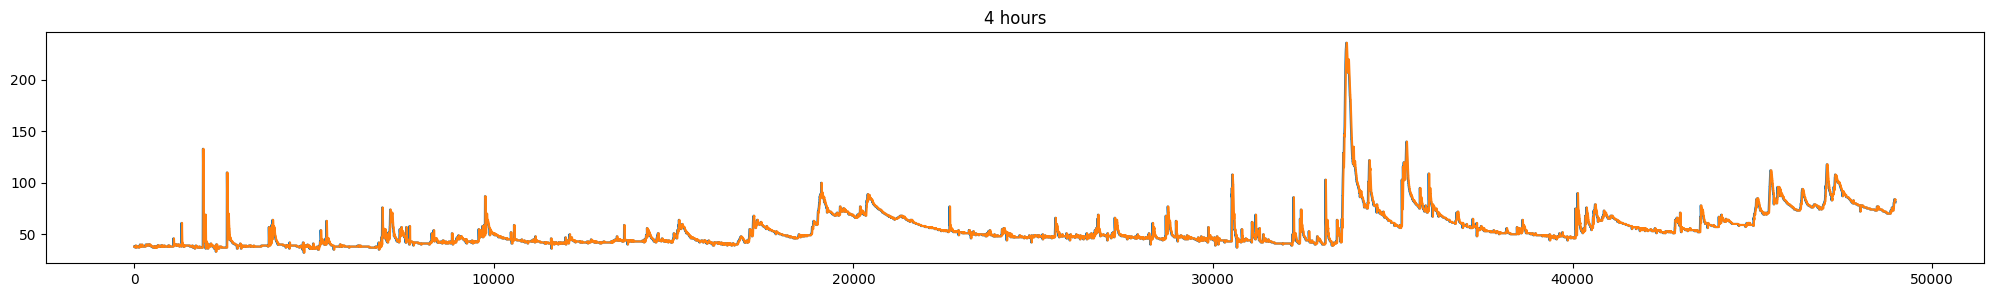

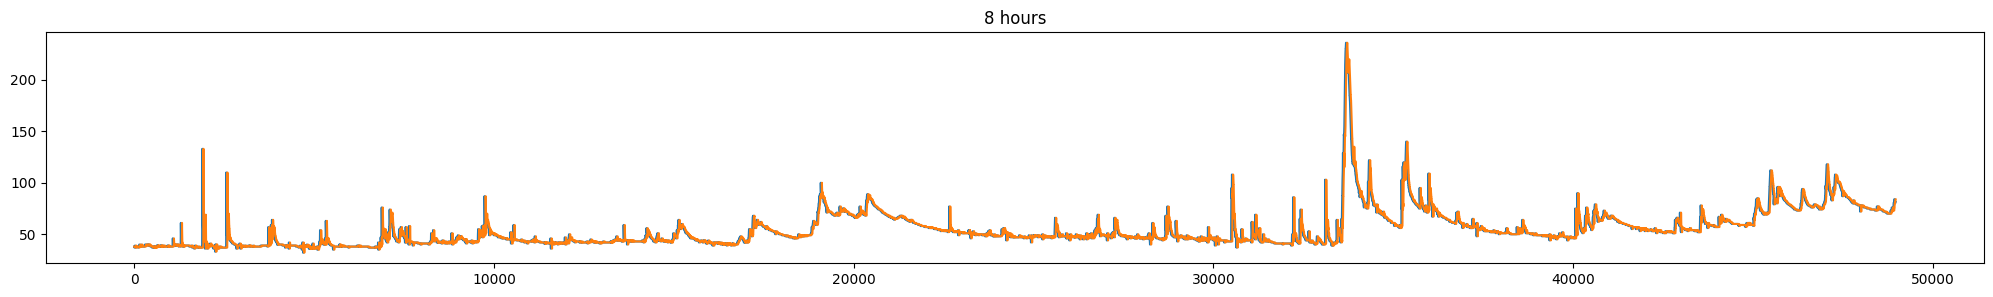

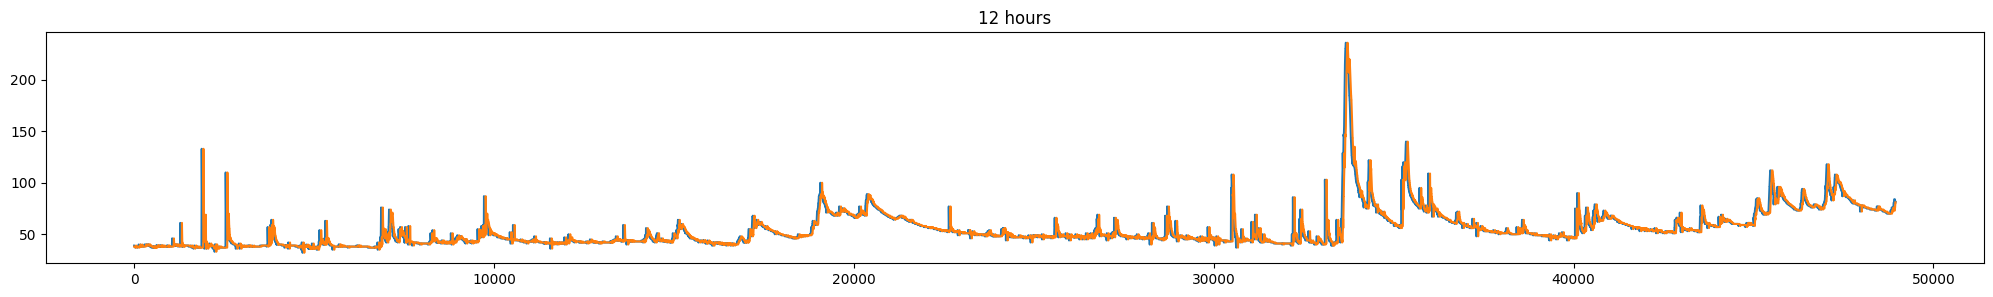


~~~~~~~~~~~~ STRPMr ~~~~~~~~~~~~



TypeError: unhashable type: 'numpy.ndarray'

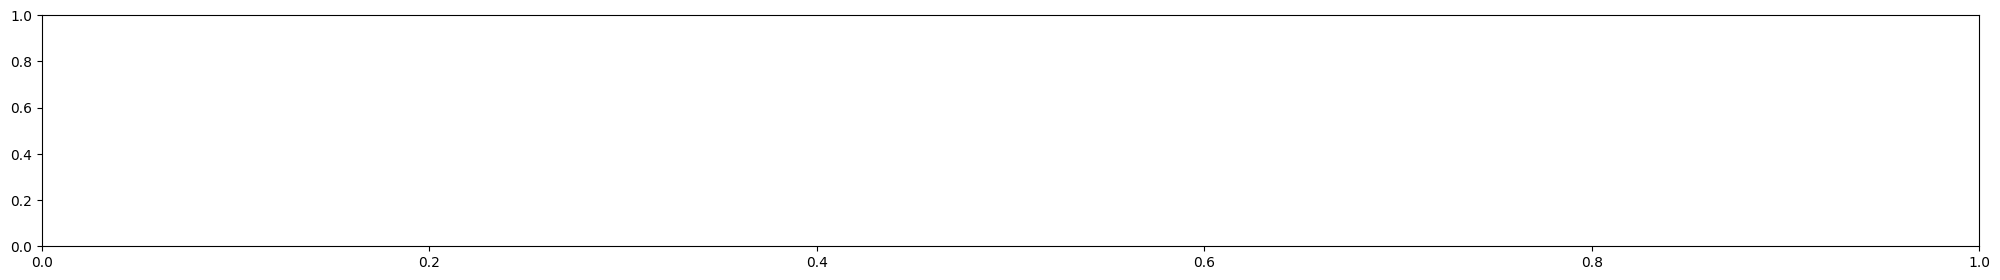

In [17]:
folder = ['Baseline', 'STRPMr']
for i in folder:
    print(f"\n~~~~~~~~~~~~ {i} ~~~~~~~~~~~~\n",)
    framework_result = evaluateFramework(i)

#### Scatter plots

In [51]:
def scatter_plot(forecast, ax, start, end, n):#, colors):
    linearmodel = LinearRegression().fit(forecast['actual'].values.reshape(-1,1), forecast['forecast'])
    X_plot = np.linspace(0,250,10)
    ax.plot(X_plot, X_plot * linearmodel.coef_[0] + linearmodel.intercept_, c='black')
    ax.scatter(forecast['actual'][start:end], forecast['forecast'][start:end],alpha=0.45)#, c=colors );

    if n==8 or n==12 or n==24:
        ax.set_xlabel('Observed (G.W)', fontsize=20)
    if n==2 or n==8:
        ax.set_ylabel('Forecasted (G.W)', fontsize=20)
    ax.title.set_text(f'{n}-hrs')
    
    coeff = np.round(linearmodel.coef_[0],3)
    if np.round(linearmodel.intercept_,3)>0:
        intercept = f'+{np.round(linearmodel.intercept_, 3)}'
    else:    
        intercept = f'{np.round(linearmodel.intercept_, 3)}'
    ax.text(0.25, 0.75, f'y={coeff}x{intercept}', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

<Figure size 2500x300 with 0 Axes>

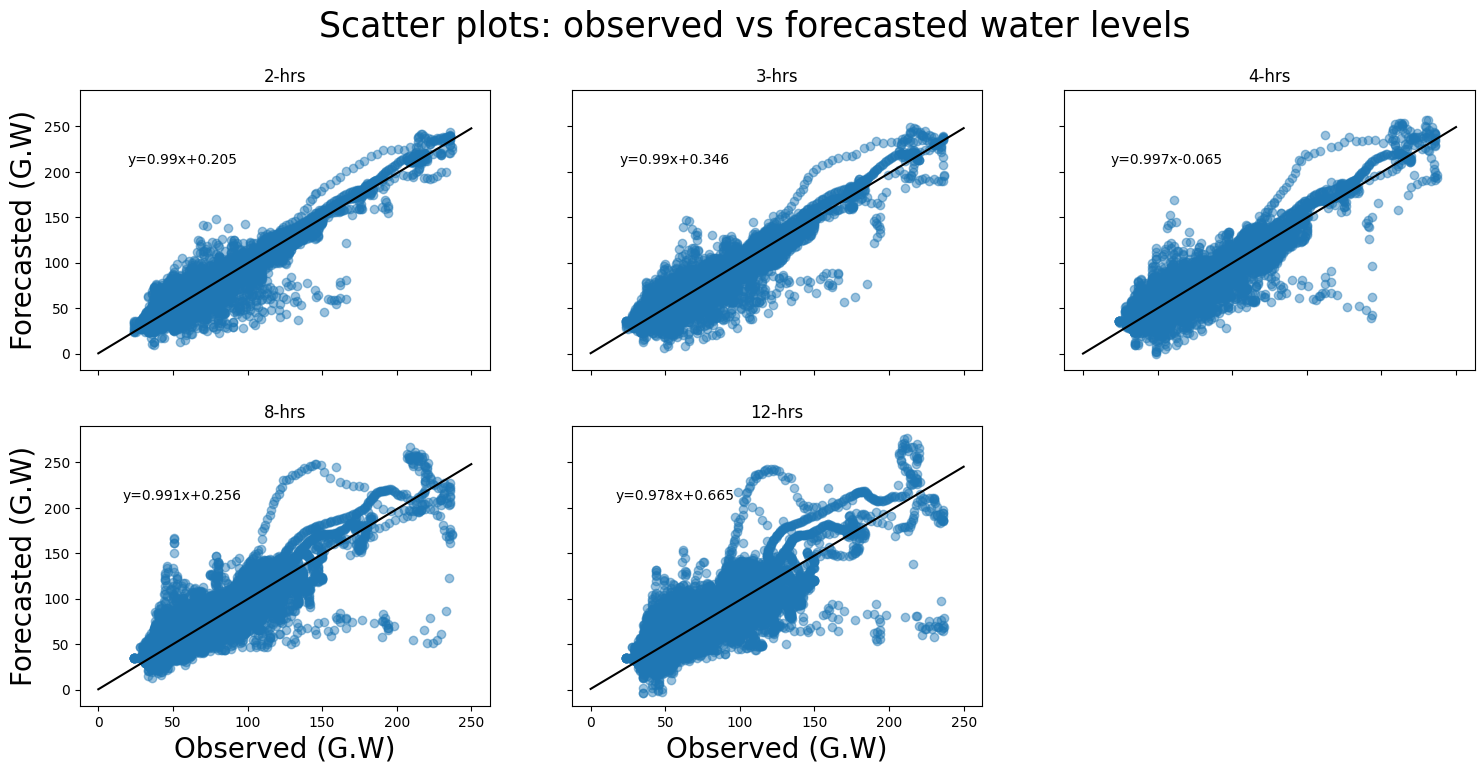

In [52]:
f = plt.figure()    
f, axes = plt.subplots(nrows = 2, ncols = 3, sharex=True, sharey = True)
f.set_size_inches(18, 8)
plt.suptitle('Scatter plots: observed vs forecasted water levels', fontsize=25)
scatter_plot(strpmr2, axes[0][0], 0, len(strpmr2), 2)
scatter_plot(strpmr3, axes[0][1], 0, len(strpmr3), 3)
scatter_plot(strpmr4, axes[0][2], 0, len(strpmr4), 4)
scatter_plot(strpmr8, axes[1][0], 0, len(strpmr8), 8)
scatter_plot(strpmr12, axes[1][1], 0, len(strpmr12), 12)
axes[-1, -1].axis('off')
plt.savefig(f'../STRPMr/Qualitative/Scatter plots Observed vs forecasted water levels.png')
plt.show()

### Plot subplots for changes and water levels

<Figure size 2500x300 with 0 Axes>

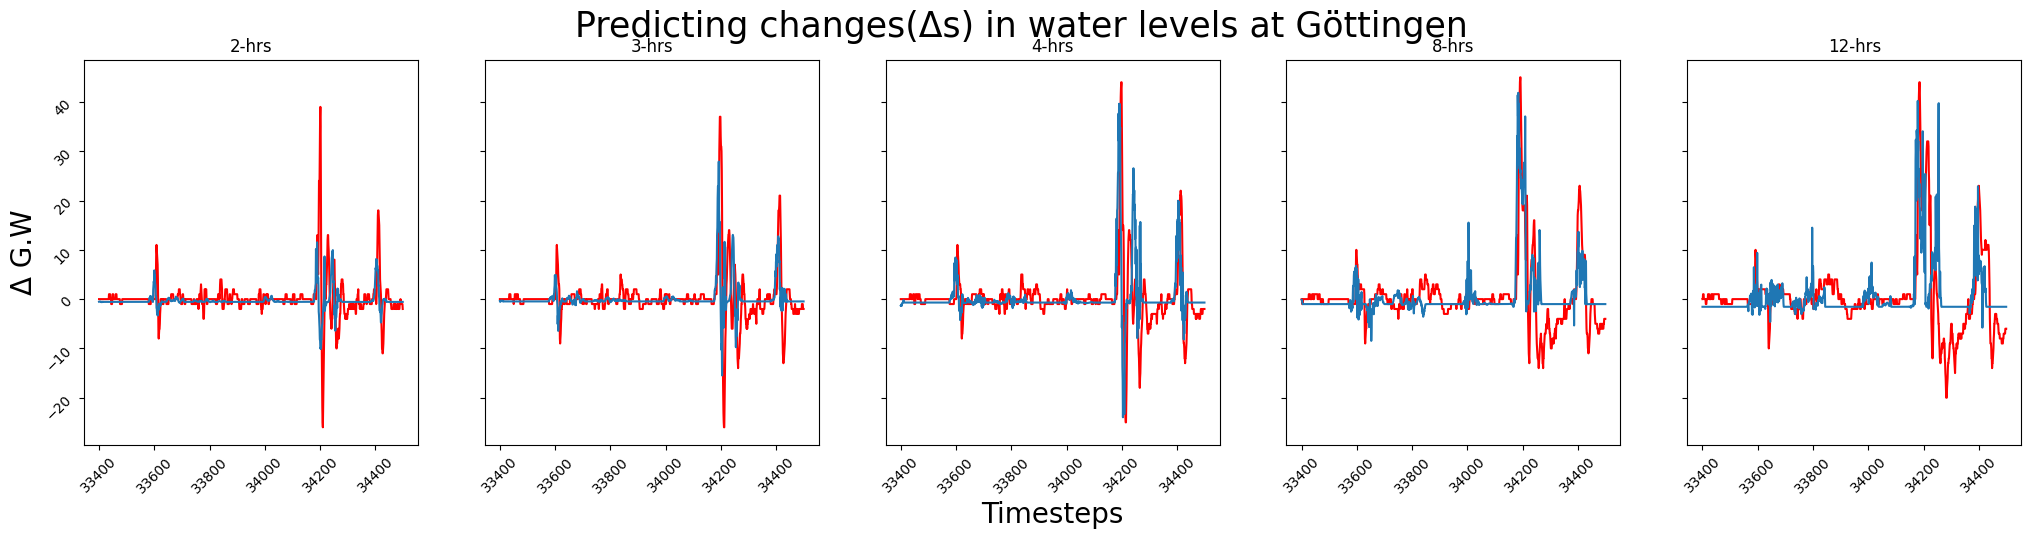

In [53]:
f = plt.figure()    
f, axes = plt.subplots(nrows = 1, ncols = 5, sharex=True, sharey = True)
f.set_size_inches(25, 5)
title = 'Predicting changes(Δs) in water levels at Göttingen'
plt.suptitle(title, fontsize=25)
forecast_plot(pred_strpmr[0]['ytrue'], pred_strpmr[0]['ypred'], '', axes[0], 2, 33400, 34500, False)
forecast_plot(pred_strpmr[1]['ytrue'], pred_strpmr[1]['ypred'], '', axes[1], 3, 33400, 34500, False)
forecast_plot(pred_strpmr[2]['ytrue'], pred_strpmr[2]['ypred'], '', axes[2], 4, 33400, 34500, False)
forecast_plot(pred_strpmr[3]['ytrue'], pred_strpmr[3]['ypred'], '', axes[3], 8, 33400, 34500, False)
forecast_plot(pred_strpmr[4]['ytrue'], pred_strpmr[4]['ypred'], '', axes[4], 12, 33400, 34500, False)
plt.savefig(f'../STRPMr/Qualitative/{title}.png')
plt.show();

<Figure size 2500x300 with 0 Axes>

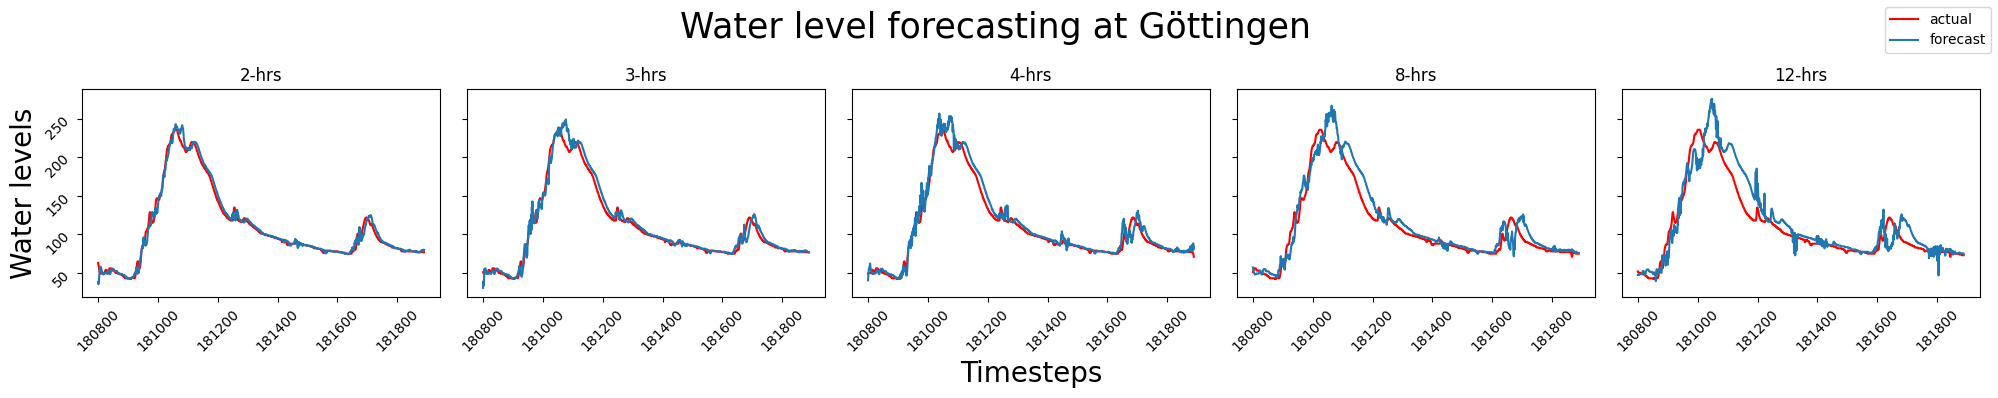

In [54]:
plot_one_graph(baseline, strpmr, 180800, 181890, 'Water level forecasting at Göttingen')

<Figure size 2500x300 with 0 Axes>

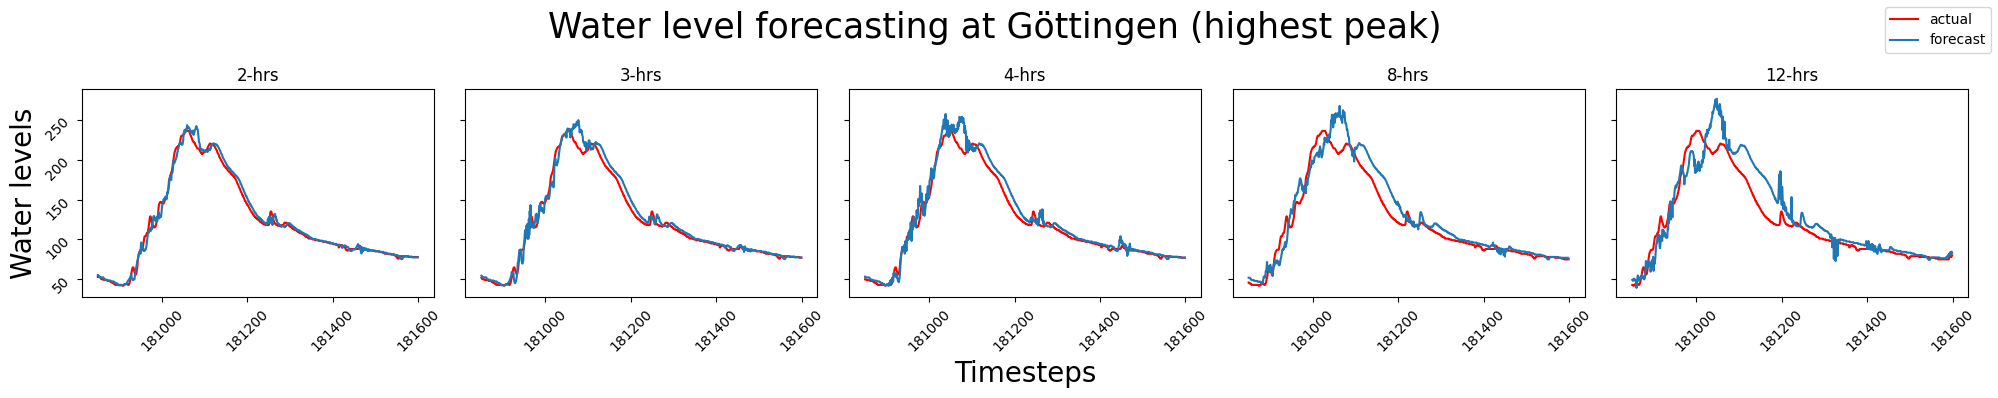

In [55]:
plot_one_graph(baseline, strpmr, 180850, 181600, 'Water level forecasting at Göttingen (highest peak)')

<Figure size 2500x300 with 0 Axes>

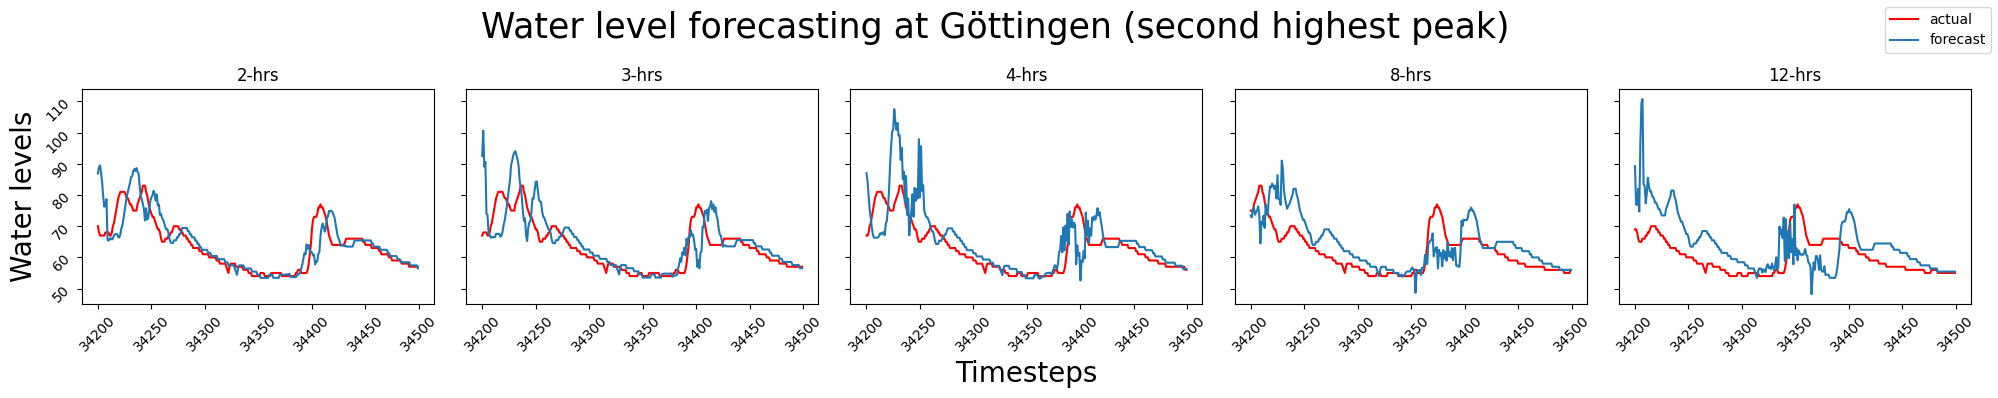

In [56]:
plot_one_graph(baseline, strpmr, 34200, 34500, 'Water level forecasting at Göttingen (second highest peak)')

### MSE

In [45]:
def calculate_mse(ytrue, ypred):
    return np.round(mean_squared_error(ytrue, ypred),4)


def calculateMSE(folder, str):
    hours = [2, 3, 4, 8, 12]
    df = pd.DataFrame(index =[str], columns =[])
    i=0
    for h in hours:
        mse = calculate_mse(folder[i]['actual'], folder[i]['forecast'])
        df[f'{h}hrs'] = mse
        i+=1

    return df

In [57]:
folder = [baseline, strpmr]
index = ["Baseline", "STRPMr"]
df = pd.DataFrame(columns=["2hrs", "3hrs", "4hrs", "8hrs", "12hrs"])

ind = 0
for i in folder:
    mse = calculateMSE(i, index[ind])
    ind+=1
    df = pd.concat([df, mse])
    
df.to_csv(f"../MSE_Göttingen.csv", sep =",")  
df

C:\Users\ss97\AppData\Local\Temp\ipykernel_14908\2748587057.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, mse])


,2hrs,3hrs,4hrs,8hrs,12hrs
Baseline,10.4279,14.2190,17.4329,30.4476,44.9132
STRPMr,9.4819,11.7515,14.9720,24.3432,38.1199
